# Introduction
## This notebook demonstrates a simple implementation of the Quantum Baker Map based quantum image scrambling algorithm introduced in [1]. The scrambling algorithm requires the classical image to be encoded according to the NEQR scheme [2]. In this notebook, a stepwise demonstration is provided which utilizes functions developed in the NEQR and Baker map related modules. The PIL library is used for basic image processing.

## The NEQR encoder has been implemented as a functional implementation. The NEQR decoder reconstructs the classical image from the quantum state via measurements, which give a random outcome (using Python's pseudorandom number generator) to imitate the quantum measurement behaviour. The Quantum Baker map scrambling circuit is implemented via a gate based circuit, which consists of swap gates and controlled swap gates.

## Author: Dhruv Bhatnagar

# Background
### The Baker Map is a two-dimensional chaotic transform, which has been generalized to the quatum case in [1]. Chaotic maps are well suited for scrambling because they are sensitive to initial values, system parameters and because of their pseudo-randomness.[1]

# References
### [1] Hou, C., Liu, X., &amp; Feng, S. (2020). Quantum image scrambling algorithm based on discrete Baker map. Modern Physics Letters A, 35(17), 2050145. doi:10.1142/s021773232050145x
### [2] Zhang, Y., Lu, K., Gao, Y., &amp; Wang, M. (2013). NEQR: A novel enhanced quantum representation of digital images. Quantum Information Processing, 12(8), 2833-2860. doi:10.1007/s11128-013-0567-z
### [3] Google Images and the MNIST Handwritten digits dataset are credited for the input images.

# Demonstration
### First, a sample grayscale image is loaded and preprocessed to serve as an input to the NEQR encoder (and hence to the scrambler).

In [1]:
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
im = Image.open("grey1.png")
print("Input image: ", im.format, im.size, im.mode)
# The size of the image is reduced and pixel bit depth is decreased because 
# the current implementation of the scrambler becomes inefficient for larger images
im_small = im.resize((8,8))
im_gray = ImageOps.grayscale(im_small)
im_preproc = im_gray.point(lambda x: int(x/17))
print("Preprocessed image (actual input to scrambling): ", im_preproc.format, im_preproc.size, im_preproc.mode)

Input image:  PNG (592, 592) RGB
Preprocessed image (actual input to scrambling):  None (8, 8) L


### The original image and the preprocessed image are plotted to visualise them.

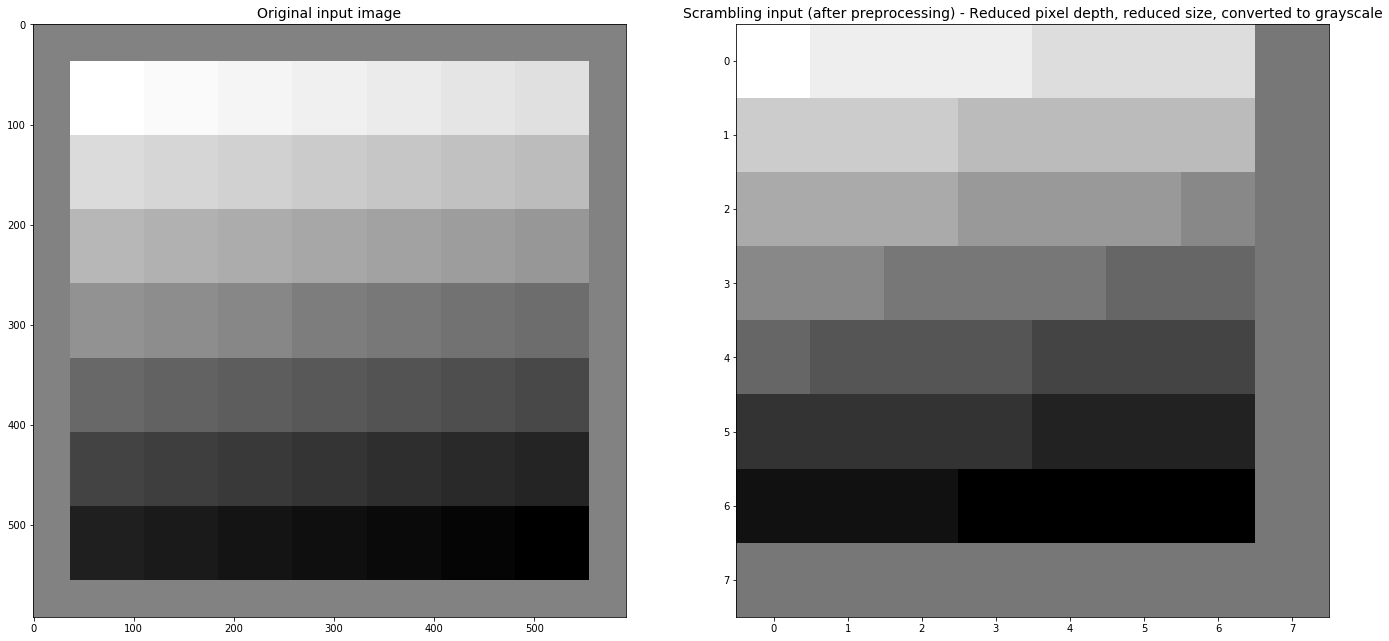

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(im)
ax[0].set_title("Original input image", fontsize=14)
ax[1].imshow(im_preproc, cmap=plt.cm.gray)
ax[1].set_title("Scrambling input (after preprocessing) - Reduced pixel depth, reduced size, converted to grayscale", fontsize=14)

fig.tight_layout()
plt.show()

### The preprocessed image is converted to a numpy array.

In [3]:
import numpy  as np
img_np = np.array(im_preproc)
print("The image before reducing the pixel bit depth is: \n", np.array(im_gray), "\n")
print("The image after reducing the pixel bit depth is: \n", img_np, "\n")
img_dim = np.ndim(img_np)
img_shape = np.shape(img_np)
img_y_max = img_shape[0]
img_x_max = img_shape[1]
print("The image size is ", img_x_max, "x", img_y_max, "pixels.")

The image before reducing the pixel bit depth is: 
 [[255 250 245 240 235 229 224 130]
 [219 214 209 203 198 193 188 130]
 [183 177 172 167 162 157 151 130]
 [146 141 135 125 120 114 109 130]
 [104  98  93  88  83  78  72 130]
 [ 67  62  57  52  46  41  36 130]
 [ 31  26  20  15  10   5   0 130]
 [130 130 130 130 130 130 130 130]] 

The image after reducing the pixel bit depth is: 
 [[15 14 14 14 13 13 13  7]
 [12 12 12 11 11 11 11  7]
 [10 10 10  9  9  9  8  7]
 [ 8  8  7  7  7  6  6  7]
 [ 6  5  5  5  4  4  4  7]
 [ 3  3  3  3  2  2  2  7]
 [ 1  1  1  0  0  0  0  7]
 [ 7  7  7  7  7  7  7  7]] 

The image size is  8 x 8 pixels.


### The Neqr_enc_dec_functions module, which contains functions developed for NEQR encoding and decoding, is imported and the preprocessed image is encoded via NEQR.

In [4]:
import Neqr_enc_dec_functions as neqr

neqr_encoded_img = neqr.simple_neqr_encoder(im_preproc, 4)

### The quantum statevector resulting from NEQR encoding of the classical image can be plotted to visualize the probability amplitudes for various basis states.

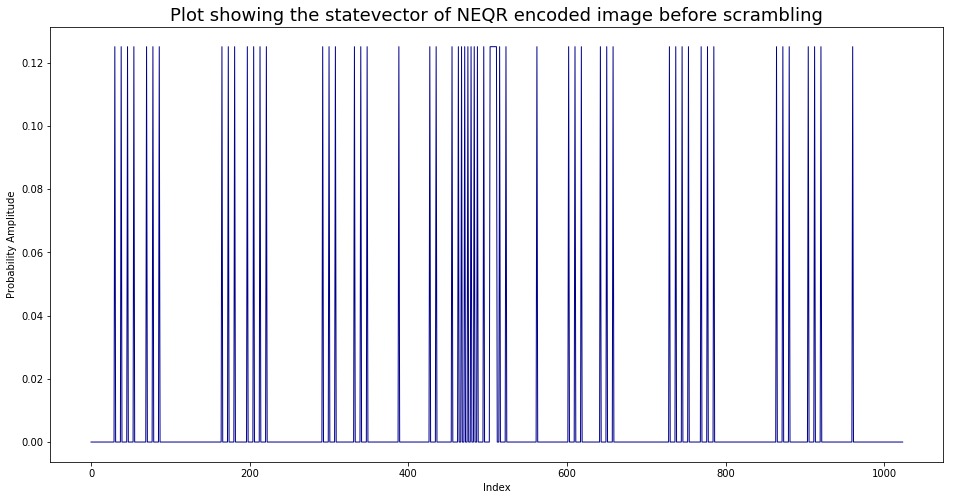

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.plot(neqr_encoded_img, linewidth = 1, color='#00008B')
plt.title("Plot showing the statevector of NEQR encoded image before scrambling", fontsize=18)
plt.xlabel("Index")
plt.ylabel("Probability Amplitude")
plt.show()

### As a sanity check, we can run the NEQR decoder to see that reversing the operation returns the same classical image from the NEQR quantum state. The discrepancy in the two images can be quantified by the difference in the norms, suitably normalized. If the number of times the measurement is carried out for decoding (num_shots) is sufficiently reduced, the images would cease to match.

In [6]:
decode_encoded_img = neqr.neqr_decoder(neqr_encoded_img, 4, img_x_max, img_y_max, num_shots = 1024)

print("Reversing the NEQR encoding on the preprocessed image returns the following image: \n", decode_encoded_img, "\n")
print("The calculated discrepancy between the two images is: \n", (np.linalg.norm(img_np - decode_encoded_img))/np.linalg.norm(np.linalg.norm(img_np)), "\n")

print("Reducing num_shots for measurement \n")
decode_encoded_img = neqr.neqr_decoder(neqr_encoded_img, 4, img_x_max, img_y_max, num_shots = 128)

print("Reversing the NEQR encoding on the preprocessed image returns the following image: \n", decode_encoded_img, "\n")
print("The calculated discrepancy between the two images is: \n", (np.linalg.norm(img_np - decode_encoded_img))/np.linalg.norm(np.linalg.norm(img_np)))

Reversing the NEQR encoding on the preprocessed image returns the following image: 
 [[15 14 14 14 13 13 13  7]
 [12 12 12 11 11 11 11  7]
 [10 10 10  9  9  9  8  7]
 [ 8  8  7  7  7  6  6  7]
 [ 6  5  5  5  4  4  4  7]
 [ 3  3  3  3  2  2  2  7]
 [ 1  1  1  0  0  0  0  7]
 [ 7  7  7  7  7  7  7  7]] 

The calculated discrepancy between the two images is: 
 0.0 

Reducing num_shots for measurement 

Reversing the NEQR encoding on the preprocessed image returns the following image: 
 [[ 0 14 14 14 13 13 13  0]
 [12  0 12  0 11 11 11  7]
 [10  0 10  0  0  9  8  7]
 [ 8  8  0  7  7  6  6  7]
 [ 6  5  5  5  4  4  4  7]
 [ 3  3  0  3  2  2  2  7]
 [ 1  1  1  0  0  0  0  7]
 [ 0  7  7  7  7  7  7  7]] 

The calculated discrepancy between the two images is: 
 0.46860311080214373


### Having succesfully encoded the classical image to a quantum state via NEQR, the baker_map_scrambling module is imported, to use the function to return the quantum gate required for quantum Baker Map image scrambling.

In [7]:
import baker_map_scrambling as baker
scrambling_gate = baker.get_baker_scrambling_gate(img_x_max, img_y_max, 4)
print("The size of the scrambling quantum gate is: ", np.shape(scrambling_gate))

The size of the scrambling quantum gate is:  (1024, 1024)


### The encoded image is scrambled.

In [8]:
scrambled_encoded_img = np.matmul(scrambling_gate, neqr_encoded_img)

### The statevector probability amplitudes before and after scrambling can be visualized as below.

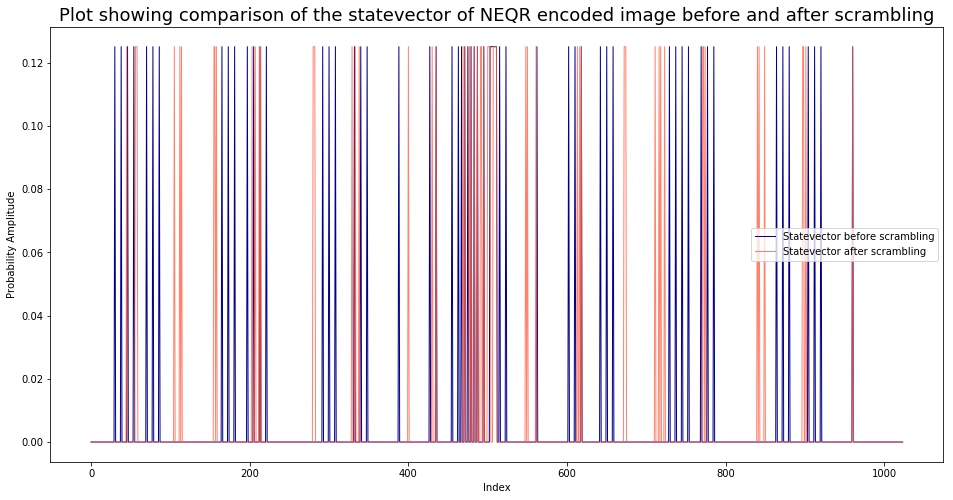

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.plot(neqr_encoded_img, color='#00008B', linewidth = 1)
plt.plot(scrambled_encoded_img, color='#FF6347', linewidth = 1, alpha=0.8)
axes.legend(['Statevector before scrambling', 'Statevector after scrambling'])
plt.title("Plot showing comparison of the statevector of NEQR encoded image before and after scrambling", fontsize=18)
plt.xlabel("Index")
plt.ylabel("Probability Amplitude")
plt.show()

### The quantum state for the scrambled image is decoded to get the classical scrambled image.

In [10]:
scrambled_decoded_img = neqr.neqr_decoder(scrambled_encoded_img, 4, img_x_max, img_y_max, num_shots = 1024)
print("The decoded classical image after scrambling is :\n", scrambled_decoded_img)

The decoded classical image after scrambling is :
 [[15 13  6  4 10  9  1  0]
 [14  5 13  4 10  1  8  0]
 [14 13  5  4 10  9  1  0]
 [12  3 11  2  7  7  6  7]
 [12 11  3  2  8  7  7  7]
 [14  5  7  7  9  0  7  7]
 [12 11  3  2  8  6  7  7]
 [11  3  7  7  7  7  7  7]]


### The images before and after scrambling are displayed side to side for comparison.

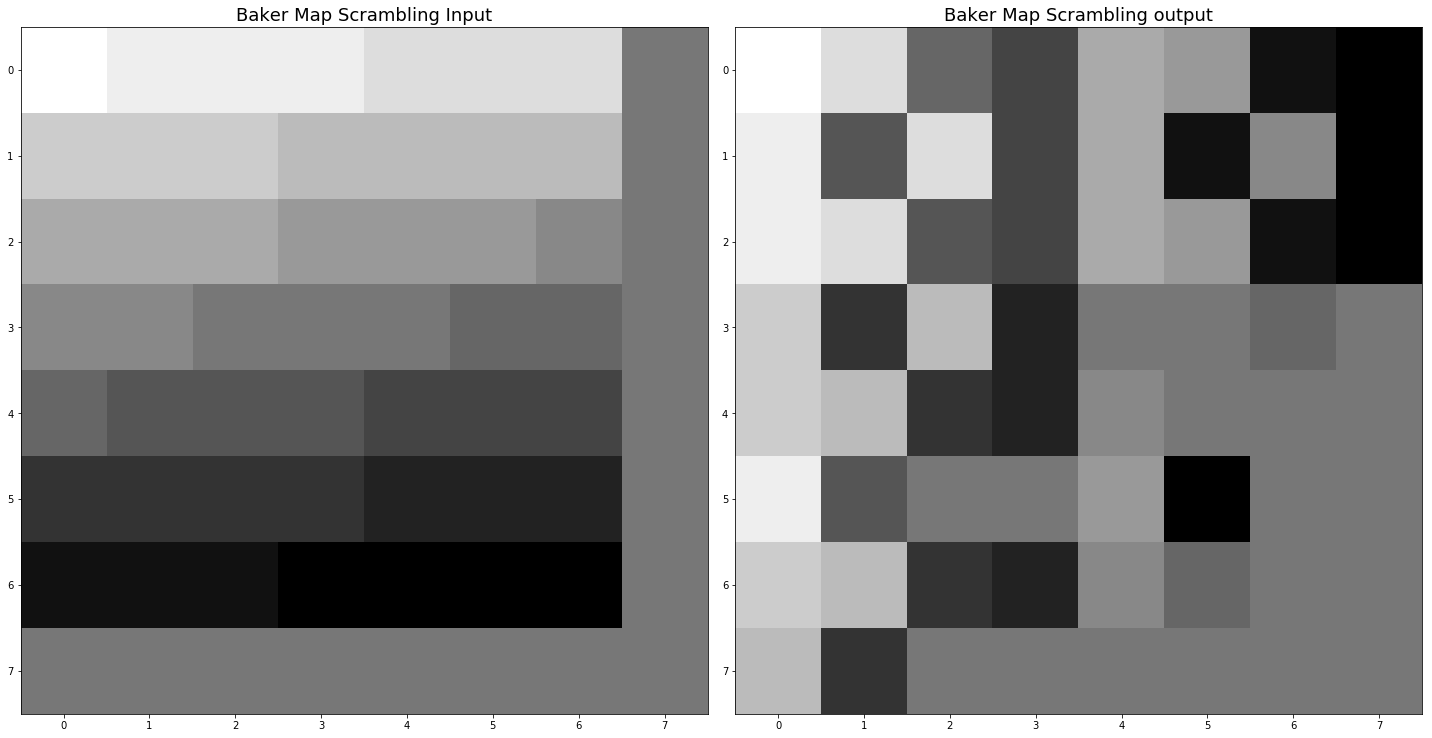

In [11]:
scrambled_img = Image.fromarray(scrambled_decoded_img)

fig, axes = plt.subplots(1, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(im_preproc, cmap=plt.cm.gray)
ax[0].set_title("Baker Map Scrambling Input", fontsize=18)
ax[1].imshow(scrambled_img, cmap=plt.cm.gray)
ax[1].set_title("Baker Map Scrambling output", fontsize=18)
fig.tight_layout()
plt.show()

### Another sample image is scrambled below.

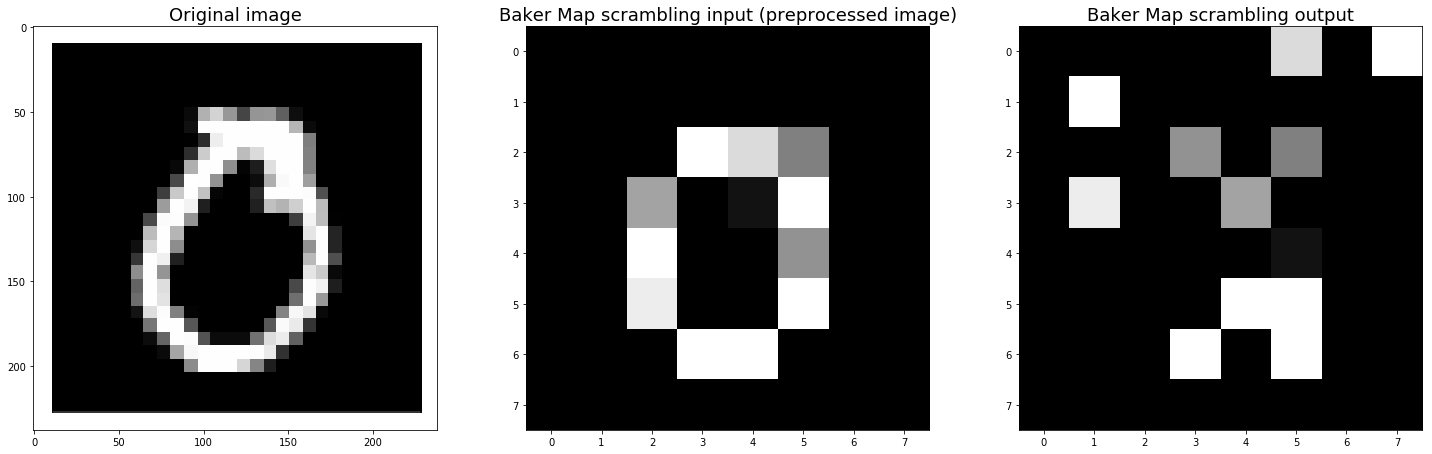

In [12]:
im = Image.open("sample_zero_image.png")
im_small = im.resize((8,8))
im_gray = ImageOps.grayscale(im_small)
im_preproc = im_gray.point(lambda x: int(x/17))
img_np = np.array(im_preproc)
img_dim = np.ndim(img_np)
img_shape = np.shape(img_np)
img_y_max = img_shape[0]
img_x_max = img_shape[1]

neqr_encoded_img = neqr.simple_neqr_encoder(im_preproc, 4)
decode_encoded_img = neqr.neqr_decoder(neqr_encoded_img, 4, img_x_max, img_y_max, num_shots = 1024)
scrambling_gate = baker.get_baker_scrambling_gate(img_x_max, img_y_max, 4)
scrambled_encoded_img = np.matmul(scrambling_gate, neqr_encoded_img)
scrambled_decoded_img = neqr.neqr_decoder(scrambled_encoded_img, 4, img_x_max, img_y_max, num_shots = 1024)
scrambled_img = Image.fromarray(scrambled_decoded_img)

fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].set_title("Original image", fontsize=18)
ax[1].imshow(im_preproc, cmap=plt.cm.gray)
ax[1].set_title("Baker Map scrambling input (preprocessed image)", fontsize=18)
ax[2].imshow(scrambled_img, cmap=plt.cm.gray)
ax[2].set_title("Baker Map scrambling output", fontsize=18)

fig.tight_layout()
plt.show()

# Conclusion and scope for future work
### This is a work in progress, and a basic working implementation of NEQR encoding and Quantum image scrambling based on the Baker map has been achieved. An important improvement could be to make this program run efficiently for larger images, of the size which is relevant for real world applications. To that end, techniques such as sparse matrices and boolean optimization are being explored. After an efficient implementation is achieved, applications such as image watermarking can be demonstrated.